In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [9]:
data =pd.read_csv('D:/Data Science/Assignment/13KNN/glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [10]:
from sklearn.preprocessing import StandardScaler


In [12]:
#standardization
std_scaling= StandardScaler()
std_scaling.fit(data.drop('Type',axis=1))

StandardScaler()

In [16]:
#create data frame
std_scaled=std_scaling.transform(data.drop('Type',axis=1))

scaled_data = pd.DataFrame(std_scaled,columns=data.columns[:-1])

In [18]:
#split data into train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_data,data['Type'],test_size=0.2)

In [22]:
#KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)


In [23]:
#prediction
np.mean(pred==y_test)

0.6511627906976745

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,pred)

array([[12,  1,  1,  0,  0,  0],
       [ 4,  8,  1,  0,  0,  0],
       [ 4,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 1,  1,  0,  0,  1,  5]], dtype=int64)

In [26]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           1       0.86      0.57      0.69        21
           2       0.62      0.73      0.67        11
           3       0.17      0.33      0.22         3
           5       1.00      1.00      1.00         1
           6       1.00      0.50      0.67         2
           7       0.62      1.00      0.77         5

    accuracy                           0.65        43
   macro avg       0.71      0.69      0.67        43
weighted avg       0.73      0.65      0.66        43



In [27]:
error_rate=[]
for i in range(1,40):
    knn_model=KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train,y_train)
    pred_i=knn_model.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test).round(2))
print(error_rate)

[0.35, 0.37, 0.33, 0.37, 0.37, 0.44, 0.47, 0.37, 0.42, 0.4, 0.42, 0.4, 0.42, 0.37, 0.37, 0.4, 0.4, 0.42, 0.35, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.35, 0.37, 0.37, 0.4, 0.35, 0.37, 0.4, 0.37, 0.37, 0.37, 0.4, 0.37, 0.37]


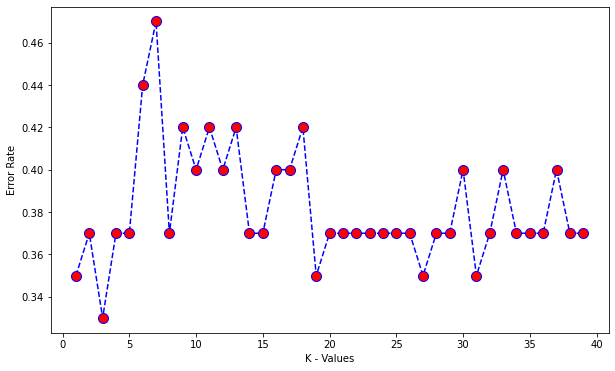

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('K - Values')
plt.ylabel('Error Rate')
plt.show()

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
pred= knn.predict(x_test)
print('accuracy =',np.mean(pred==y_test))

print(confusion_matrix(y_test,pred))

print(classification_report(pred,y_test))

accuracy = 0.627906976744186
[[13  1  0  0  0  0]
 [ 4  9  0  0  0  0]
 [ 5  1  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  1  0  0]
 [ 2  1  0  0  1  4]]
              precision    recall  f1-score   support

           1       0.93      0.54      0.68        24
           2       0.69      0.75      0.72        12
           3       0.00      0.00      0.00         0
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00         1
           7       0.50      1.00      0.67         4

    accuracy                           0.63        43
   macro avg       0.52      0.47      0.46        43
weighted avg       0.80      0.63      0.68        43

